In [11]:
import os
import pandas as pd

# Paths
metadata_path = r"../dataset/filtered_dataset/filtered_movies_metadata.csv"
processed_posters_folder = r"../dataset/filtered_dataset/processed_posters/"

# Load metadata
metadata = pd.read_csv(metadata_path)

# Filter for rows where the poster exists
metadata['poster_available'] = metadata['id'].apply(
    lambda movie_id: os.path.exists(os.path.join(processed_posters_folder, f"{movie_id}.npy"))
)
filtered_metadata = metadata[metadata['poster_available']]

# Count unique movies
total_unique_movies = filtered_metadata['id'].nunique()

print(f"Total unique movies with posters: {total_unique_movies}")


Total unique movies with posters: 5466


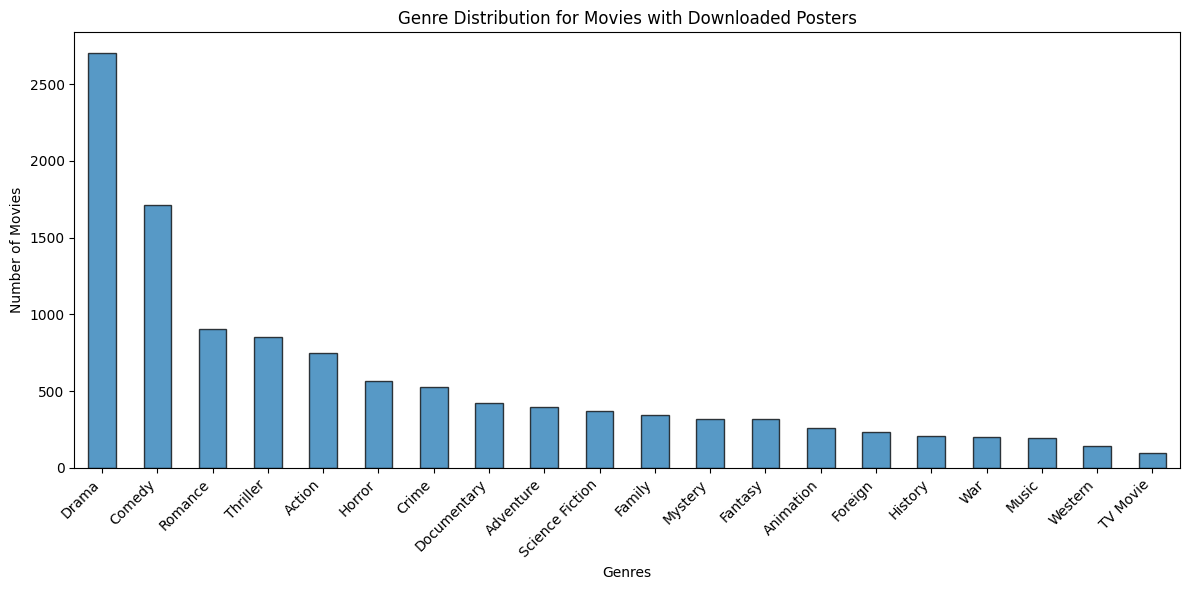

Genre Distribution for Movies with Downloaded Posters:
genres
Drama              2702
Comedy             1712
Romance             907
Thriller            851
Action              751
Horror              567
Crime               524
Documentary         426
Adventure           397
Science Fiction     368
Family              343
Mystery             317
Fantasy             316
Animation           260
Foreign             231
History             208
War                 203
Music               194
Western             145
TV Movie             95
Name: count, dtype: int64


In [12]:
import matplotlib.pyplot as plt

# Load metadata
metadata = pd.read_csv(metadata_path)

# Filter for rows where the poster exists
metadata['poster_available'] = metadata['id'].apply(
    lambda movie_id: os.path.exists(os.path.join(processed_posters_folder, f"{movie_id}.npy"))
)
filtered_metadata = metadata[metadata['poster_available']].copy()

# Explode genres to analyze individual genre occurrences
filtered_metadata['genres'] = filtered_metadata['genres'].apply(eval)  # Convert stringified lists to actual lists
exploded_genres = filtered_metadata.explode('genres')

# Count occurrences of each genre
genre_distribution = exploded_genres['genres'].value_counts()

# Plot the distribution of genres
plt.figure(figsize=(12, 6))
genre_distribution.plot(kind='bar', alpha=0.75, edgecolor='black')
plt.title("Genre Distribution for Movies with Downloaded Posters")
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig("../dataset/available_genre_distribution.png")
plt.show()

print("Genre Distribution for Movies with Downloaded Posters:")
print(genre_distribution)


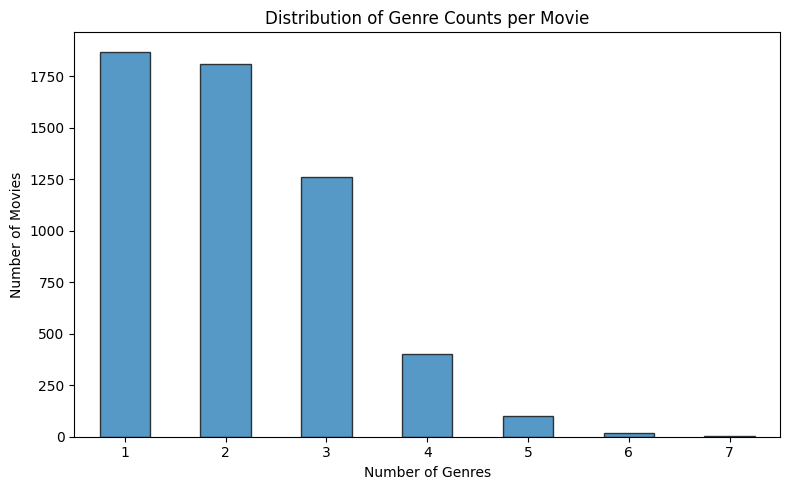

Genre Count Distribution (Number of Genres per Movie):
genre_count
1    1871
2    1810
3    1261
4     404
5     101
6      18
7       2
Name: count, dtype: int64


In [13]:
# Load metadata
metadata = pd.read_csv(metadata_path)

# Filter for rows where the poster exists
metadata['poster_available'] = metadata['id'].apply(
    lambda movie_id: os.path.exists(os.path.join(processed_posters_folder, f"{movie_id}.npy"))
)
filtered_metadata = metadata[metadata['poster_available']].copy()

# Calculate the number of genres per movie
filtered_metadata['genres'] = filtered_metadata['genres'].apply(eval)  # Convert stringified lists to actual lists
filtered_metadata['genre_count'] = filtered_metadata['genres'].apply(len)

# Plot the distribution of genre counts per movie
plt.figure(figsize=(8, 5))
filtered_metadata['genre_count'].value_counts().sort_index().plot(kind='bar', alpha=0.75, edgecolor='black')
plt.title("Distribution of Genre Counts per Movie")
plt.xlabel("Number of Genres")
plt.ylabel("Number of Movies")
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig("../dataset/genre_count_distribution.png")
plt.show()

genre_count_distribution = filtered_metadata['genre_count'].value_counts().sort_index()
print("Genre Count Distribution (Number of Genres per Movie):")
print(genre_count_distribution)


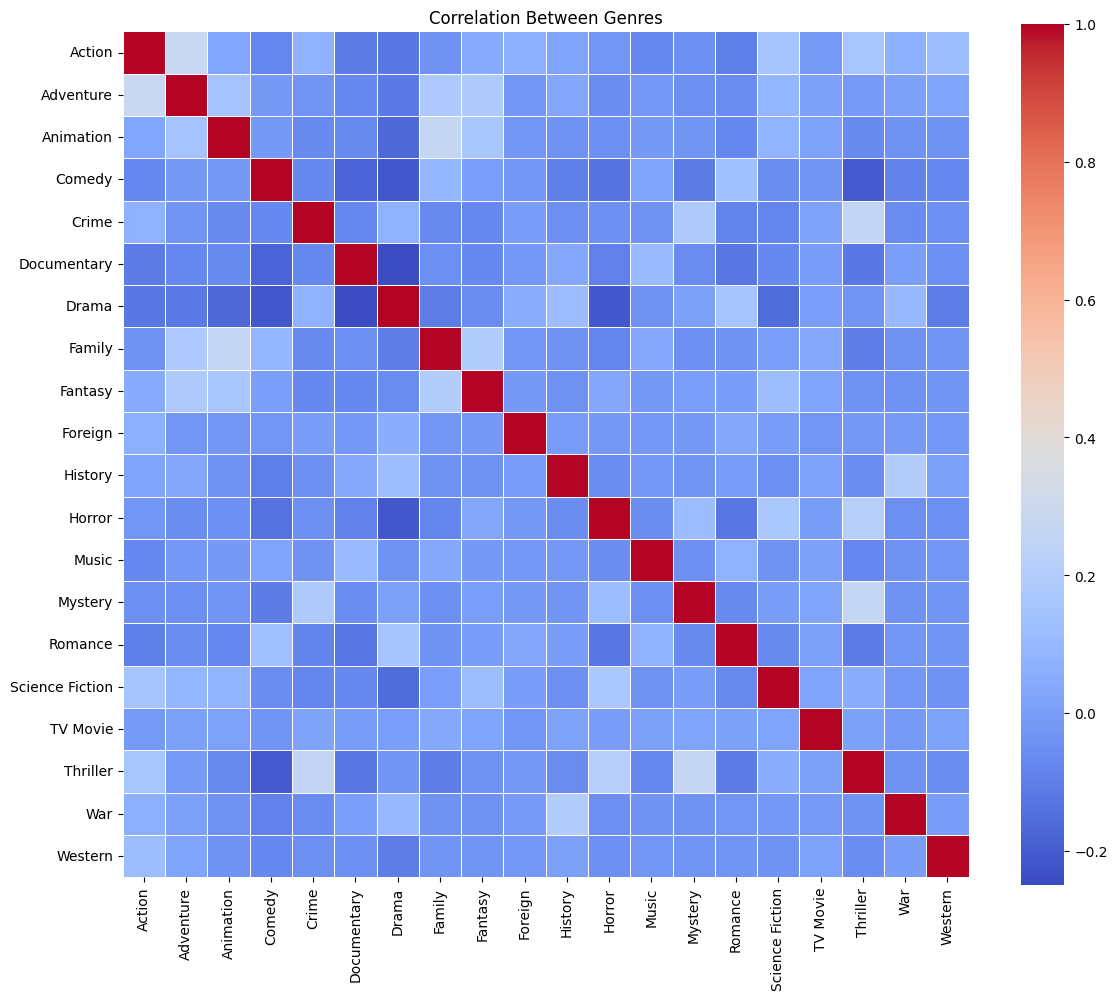

In [16]:
import seaborn as sns

# Load metadata
metadata = pd.read_csv(metadata_path)

# Filter for rows where the poster exists
metadata['poster_available'] = metadata['id'].apply(
    lambda movie_id: os.path.exists(os.path.join(processed_posters_folder, f"{movie_id}.npy"))
)
filtered_metadata = metadata[metadata['poster_available']].copy()

# Prepare genre matrix
filtered_metadata['genres'] = filtered_metadata['genres'].apply(eval)  # Convert stringified lists to actual lists
genre_list = sorted(set(genre for genres in filtered_metadata['genres'] for genre in genres))  # Get all unique genres
genre_matrix = pd.DataFrame(
    filtered_metadata['genres'].apply(lambda x: [1 if genre in x else 0 for genre in genre_list]).tolist(),
    columns=genre_list
)

# Calculate correlation matrix
genre_corr = genre_matrix.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(genre_corr, annot=False, cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Between Genres")
plt.tight_layout()

# Save and show the plot
plt.savefig("../dataset/genre_correlation_heatmap.png")
plt.show()
